In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [13]:
titles.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Temptation              10
The Outsider            10
Paradise                10
Othello                 10
She                     10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [20]:
t = titles
t = t[(t.year < 1940) & (t.year > 1930)] #I guess this reads as "create a dataframe from a dataframe where ..."
t.year.value_counts().head(3)

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

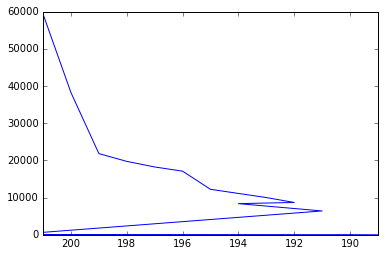

In [12]:
t = titles
t = t.year // 10
t.value_counts().plot() #min 50 of the video == https://www.youtube.com/watch?v=5JnMutdy6Fw?t=50m0s

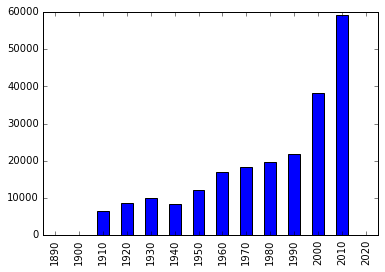

In [24]:
t = titles
t = t.year // 10 * 10
t.value_counts().sort_index().plot(kind='bar') #sort_values sorts frequencies, not years!

### Plot the number of "Hamlet" films made each decade.

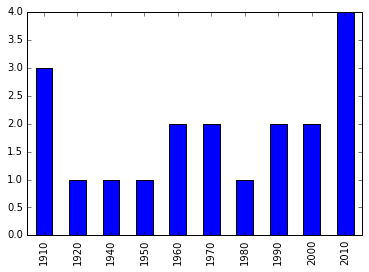

In [27]:
t = titles
t = t[t.title == "Hamlet"] #because t.title == "Hamlet" is a series, and t[t.title == "Hamlet"] is a df!
t = t.year // 10 * 10 #and now t.year is also a df
#it looks like I'm getting to a point in which I can read the expressions in natural language,
#which, if it is possible, would be very helpful!
t.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

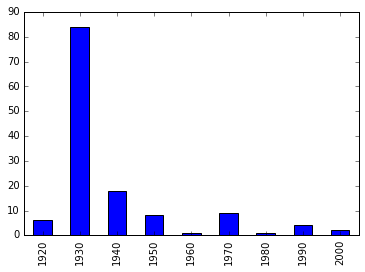

In [47]:
# let me see if I can do it from memory, just knowing what I know about how to read out loud ...
# I want to select, from dataframe "cast", a smaller dataframe, called "c",
# with only the records with "Rustler" in the field "character"
c = cast
c = c[c.character == "Rustler"] #bingo!
# len(c) #I know it's many of them
# c.head() #I see the variable names
c = c.year // 10 * 10 #had to look it up in [33], aka [-2]; it's read as "give me a SERIES from year with this formula
#c.head()
# and now I want the plot ...
c.value_counts().sort_index().plot(kind="bar") #value.counts() takes a series, which is what c is now!
#had to copy it from [-2]

### Plot the number of "Hamlet" characters each decade.

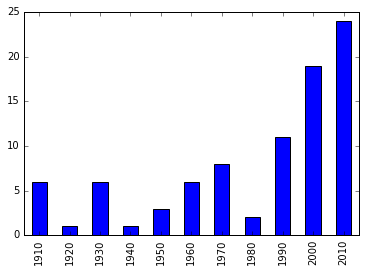

In [54]:
df = cast
df = df[df.character == "Hamlet"] #reads, give me a dataframe from dataframe df in which character is "Hamlet"
#df.head() shows it works - gives a df
s = df.year // 10 * 10 #reads, give me a series from dataframe df taking column year and doing the maths
#s.head() #shows it works - gives a series
#s.value_counts() #gives me the frequencies, with years sorted by frequency
#s.value_counts().sort_index() #will sort by year
s.value_counts().sort_index().plot(kind="bar") #bingo

### What are the 11 most common character names in movie history?

In [66]:
cast.character #is a series
#cast.character.value_counts() #is (a series with) the value counts of that series
cast.character.value_counts().head(11) #so head() works with a series too, ok

Himself        18788
Dancer         11495
Extra           9812
Reporter        7823
Doctor          7091
Policeman       6646
Student         6633
Nurse           6337
Party Guest     6329
Bartender       6306
Minor Role      6091
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [78]:
cast #so I want the "name" where "character == Herself"
#cast.character == "Herself" #gives me a series of False/True
#s = cast.character == "Herself" #is a series
#I don't want a series, I want a df!
df = cast[cast.character == "Herself"] #give me a df from cast such that the condition expressed by the series is met
#Now that I have a df, I want the 10 most frequent names

df.name.value_counts().head(10)
#give me the 10 first elements of a series of value counts of the variable name of the df
#take dataframe, take column, count it, give me the first ten
#starts to make sense! #AintISlow

Joyce Brothers        14
Queen Elizabeth II    11
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Lili?n Garc?a          6
Bunny Yeager           5
Kareena Kapoor         5
Caroline Rhea          5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [79]:
#from memory?
df = cast[cast.character == "Himself"]
df.name.value_counts().head(10)
#yesss! :dances:

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Bill Clinton             20
Franklin D. Roosevelt    20
Winston Churchill        20
Martin Luther King       19
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [93]:
cast #i want to select year 1945
df = cast[cast.year == 1945] #because cast.year == 1945 is a series, and cast[blah] is the df from "trues"
df.name.value_counts().head(10) #from data frame select variable, count, give me the top 10

Emmett Vogan       39
Sam (II) Harris    30
Harold Miller      29
Bess Flowers       28
Nolan Leary        27
Frank O'Connor     26
Franklyn Farnum    25
Larry Steers       25
Pierre Watkin      24
Herman Hack        24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [95]:
#from memory
df = cast[cast.year == 1985]
df.name.value_counts().head(10)

Mammootty         21
Sukumari          19
Shakti Kapoor     19
Mohanlal          15
Lou Scheimer      15
Aruna Irani       14
Raj Babbar        14
Rajesh Khanna     13
Deven Verma       13
Pinchoo Kapoor    12
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

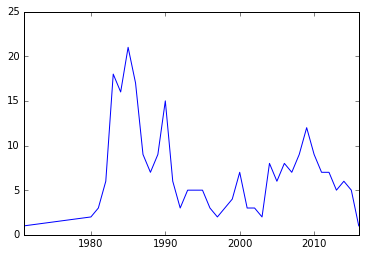

In [113]:
df = cast[cast.name == "Mammootty"] #make small dataframe from big one
#df.year.plot() #df.year is a series; it gives us that very wrong chart
df.year.value_counts().sort_index().plot() #from dataframe take column, count frequency, use the column values, plot 'em

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [120]:
df = cast[cast.character.str.startswith("Patron in")] #cool, got it; tab is your friend, to find startswith
df.character.value_counts().head(10) #no need to sort, as value_counts sorts with most frequent first

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [126]:
#from memory ... okish, but forgot the .str., and the actual name of the values "function"
df = cast[cast.character.str.startswith("Science")]
df.character.value_counts().head(10) #value_counts, not count_values ... name, not verbs, ok

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Fair Judge       5
Science Club Member      5
Science Promo Cadet      4
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

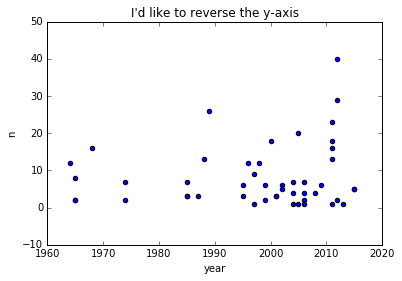

In [138]:
df = cast[cast.name == "Judi Dench"]
df[['n', 'year']].plot(x = 'year', y = 'n', kind = "scatter", title = "I'd like to reverse the y-axis")
#fame dilution? likes smaller jobs?

### Plot the n-values of Cary Grant's roles through his career.

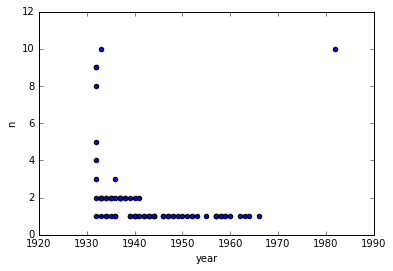

In [140]:
df = cast[cast.name == "Cary Grant"]
df[['year', 'n']].plot(x = 'year', y = 'n', kind = 'scatter')
#forgot the double =, but otherwise ok
#Mr Grant had more promient roles than whoever the other actress was, and more or less retired for a very long time

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

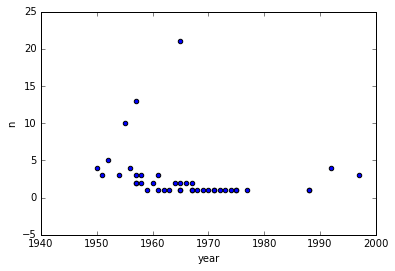

In [142]:
#from memory
df = cast[cast.name == "Sidney Poitier"]
df[['year', 'n']].plot(x = 'year', y = 'n', kind = 'scatter') #minor error, typed 'name' instead of first 'year'
#basically filled the screen, he did; always prominent roles - i wonder about 1965-ish, what was that film

In [145]:
#df = df[(df.year < 1970) & (df.year > 1960) & (df.n > 20)]
#df

df[df.n > 20] #the above works, but this is simpler!

,title,year,name,type,character,n
1669312,The Greatest Story Ever Told,1965,Sidney Poitier,actor,Simon of Cyrene,21.0


### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [149]:
df = cast[(cast.year > 1950) & (cast.year <= 1960) & (cast.n == 1)] #assuming 1950s = 1951-60
actors = df[df.type == "actor"]
actresses = df[df.type == "actress"]
len(actors), len(actresses)

(6548, 2880)

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [152]:
#from memory? let's give it a go -- one final push ...
df = cast[(cast.year > 1950) & (cast.year <=1960) & (cast.n == 2)]
#tried len(df.type["actor"]) but that didn't work, so copying
actors = df[df.type == "actor"]
actresses = df[df.type == "actress"]
len(actors), len(actresses)

(4483, 4523)

In [ ]:
#interesting results ...